___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

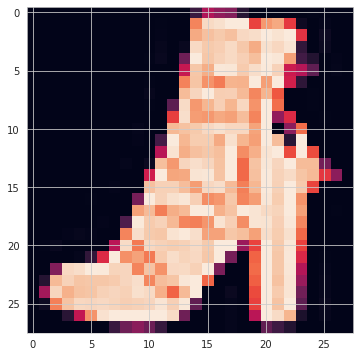

In [ ]:
plt.imshow(x_train[11]);

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[11]

9

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
y_train[11]

9

In [ ]:
classes[y_train[0]]

'Ankle boot'

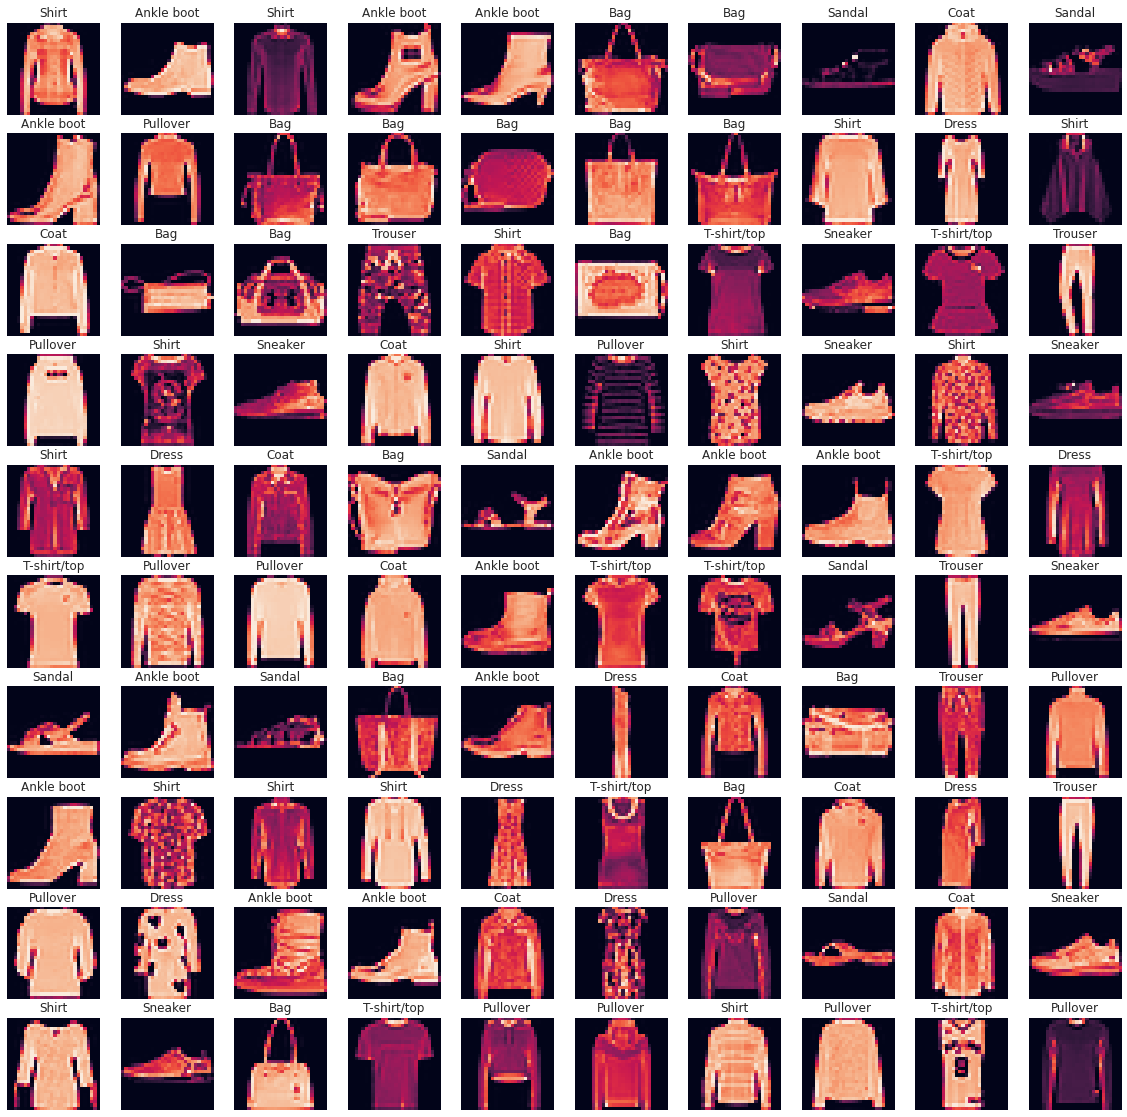

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(100):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(10, 10, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
x_train[11].min()

0

In [ ]:
x_train[11].max()

255

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
x_train[11].min()

0.0

In [ ]:
x_train[11].max()

1.0

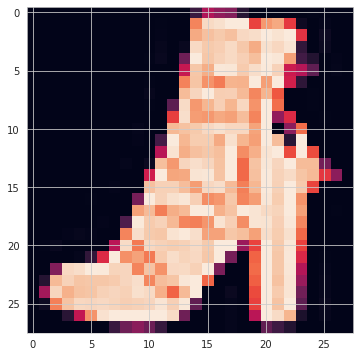

In [ ]:
plt.imshow(x_train[11]);

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
x_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [ ]:
Y_train[11]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
X_train = x_train
X_test = x_test

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=42, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 42)        10626     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 42)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2058)              0         
                                                                 
 dense (Dense)               (None, 128)               2

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/100
469/469 [==============================] - 56s 117ms/step - loss: 0.5129 - accuracy: 0.8171 - val_loss: 0.3662 - val_accuracy: 0.8673
Epoch 2/100
469/469 [==============================] - 53s 112ms/step - loss: 0.3195 - accuracy: 0.8852 - val_loss: 0.3373 - val_accuracy: 0.8804
Epoch 3/100
469/469 [==============================] - 50s 106ms/step - loss: 0.2789 - accuracy: 0.8988 - val_loss: 0.3058 - val_accuracy: 0.8918
Epoch 4/100
469/469 [==============================] - 49s 104ms/step - loss: 0.2443 - accuracy: 0.9097 - val_loss: 0.2740 - val_accuracy: 0.9001
Epoch 5/100
469/469 [==============================] - 49s 106ms/step - loss: 0.2231 - accuracy: 0.9178 - val_loss: 0.2541 - val_accuracy: 0.9073
Epoch 6/100
469/469 [==============================] - 49s 105ms/step - loss: 0.2070 - accuracy: 0.9231 - val_loss: 0.2465 - val_accuracy: 0.9113
Epoch 7/100
469/469 [==============================] - 52s 110ms/step - loss: 0.1886 - accuracy: 0.9312 - val_loss: 0.2560 -

**TASK 7: Plot values of metrics you used in your model.**

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.tail(5)

,loss,accuracy,val_loss,val_accuracy
15,0.077,0.971,0.310,0.911
16,0.067,0.975,0.309,0.918
17,0.058,0.978,0.351,0.912
18,0.052,0.981,0.343,0.915
19,0.047,0.982,0.361,0.921


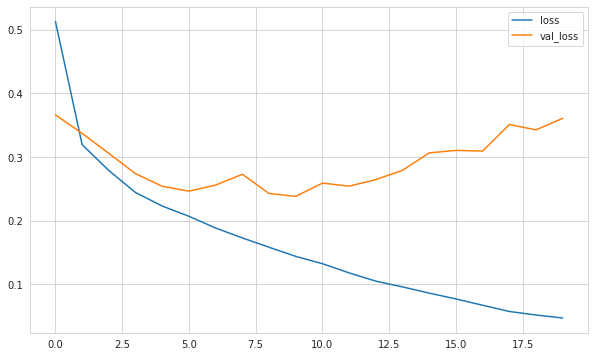

In [ ]:
summary[["loss", "val_loss"]].plot();

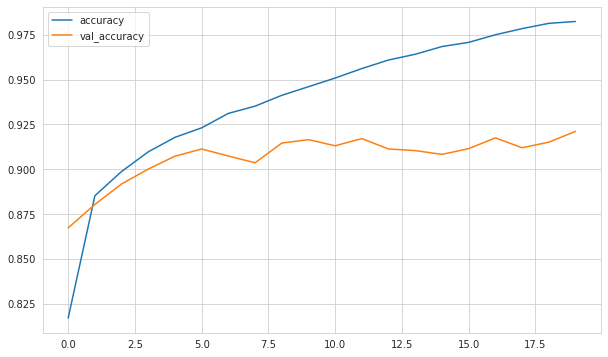

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2383 - accuracy: 0.9165


[0.2383243590593338, 0.9164999723434448]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2383243590593338
Test accuracy: 0.9164999723434448


## Prediction

In [ ]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 4s 11ms/step


array([[2.8401633e-05, 6.6465818e-06, 2.0082553e-06, ..., 3.9065268e-04,
        3.8304087e-08, 9.9912286e-01],
       [4.0719835e-05, 1.8284543e-09, 9.9992174e-01, ..., 1.5571310e-10,
        4.9148460e-11, 1.0150549e-10],
       [1.6757251e-09, 9.9999994e-01, 3.3404304e-09, ..., 1.1305411e-14,
        5.0858128e-12, 3.9357833e-14],
       ...,
       [9.3949006e-07, 7.4160971e-09, 3.1961024e-06, ..., 1.3961119e-07,
        9.9997443e-01, 5.7616885e-09],
       [1.2646916e-06, 9.9999756e-01, 5.6356282e-07, ..., 1.1064897e-10,
        2.7875466e-10, 8.3889956e-10],
       [8.6510775e-04, 1.5525719e-03, 2.4661506e-03, ..., 7.4762739e-02,
        6.4284322e-03, 2.1230240e-04]], dtype=float32)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[861   0  24  12   6   0  91   0   5   1]
 [  0 981   4   9   2   0   2   0   2   0]
 [ 16   1 856   6  67   0  54   0   0   0]
 [ 13   3  17 905  40   0  21   0   1   0]
 [  0   0  40  17 890   0  52   0   1   0]
 [  0   0   0   0   0 985   0  11   1   3]
 [ 89   1  54  25  60   0 763   0   8   0]
 [  0   0   0   0   0   7   0 980   1  12]
 [  4   1   2   1   3   1   0   1 987   0]
 [  0   0   0   0   0   5   1  37   0 957]]


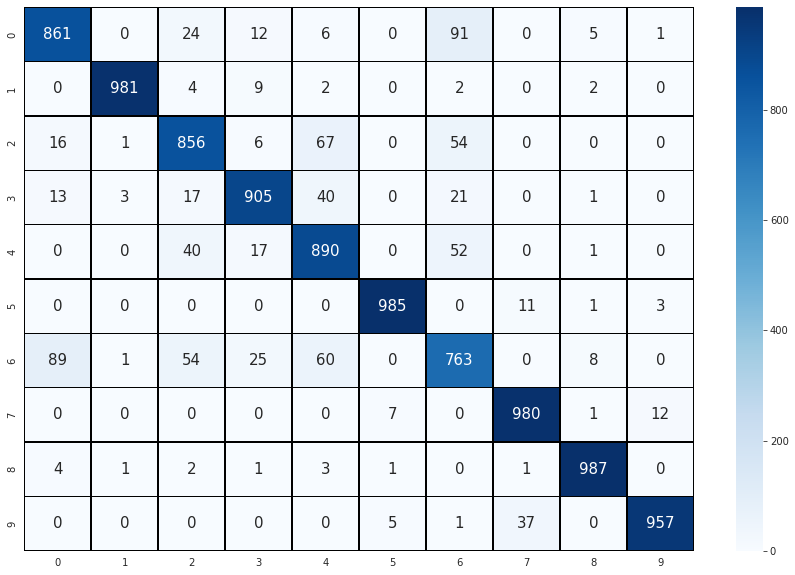

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.93      0.91      0.92      1000
           4       0.83      0.89      0.86      1000
           5       0.99      0.98      0.99      1000
           6       0.78      0.76      0.77      1000
           7       0.95      0.98      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Model 2

In [ ]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=42, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=12, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/12
469/469 [==============================] - 54s 114ms/step - loss: 0.5546 - accuracy: 0.7985 - val_loss: 0.3851 - val_accuracy: 0.8635
Epoch 2/12
469/469 [==============================] - 50s 106ms/step - loss: 0.3608 - accuracy: 0.8691 - val_loss: 0.3461 - val_accuracy: 0.8754
Epoch 3/12
469/469 [==============================] - 49s 105ms/step - loss: 0.3139 - accuracy: 0.8857 - val_loss: 0.3003 - val_accuracy: 0.8908
Epoch 4/12
469/469 [==============================] - 49s 105ms/step - loss: 0.2816 - accuracy: 0.8962 - val_loss: 0.2880 - val_accuracy: 0.8923
Epoch 5/12
469/469 [==============================] - 49s 104ms/step - loss: 0.2626 - accuracy: 0.9026 - val_loss: 0.2659 - val_accuracy: 0.9049
Epoch 6/12
469/469 [==============================] - 51s 109ms/step - loss: 0.2429 - accuracy: 0.9096 - val_loss: 0.2590 - val_accuracy: 0.9081
Epoch 7/12
469/469 [==============================] - 49s 104ms/step - loss: 0.2304 - accuracy: 0.9142 - val_loss: 0.2581 - val_ac

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.tail(5)

""


In [ ]:
summary[["loss", "val_loss"]].plot();

KeyError: ignored

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.2290 - accuracy: 0.9167


[0.22895033657550812, 0.916700005531311]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22895033657550812
Test accuracy: 0.916700005531311


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[861   0  24  12   6   0  91   0   5   1]
 [  0 981   4   9   2   0   2   0   2   0]
 [ 16   1 856   6  67   0  54   0   0   0]
 [ 13   3  17 905  40   0  21   0   1   0]
 [  0   0  40  17 890   0  52   0   1   0]
 [  0   0   0   0   0 985   0  11   1   3]
 [ 89   1  54  25  60   0 763   0   8   0]
 [  0   0   0   0   0   7   0 980   1  12]
 [  4   1   2   1   3   1   0   1 987   0]
 [  0   0   0   0   0   5   1  37   0 957]]


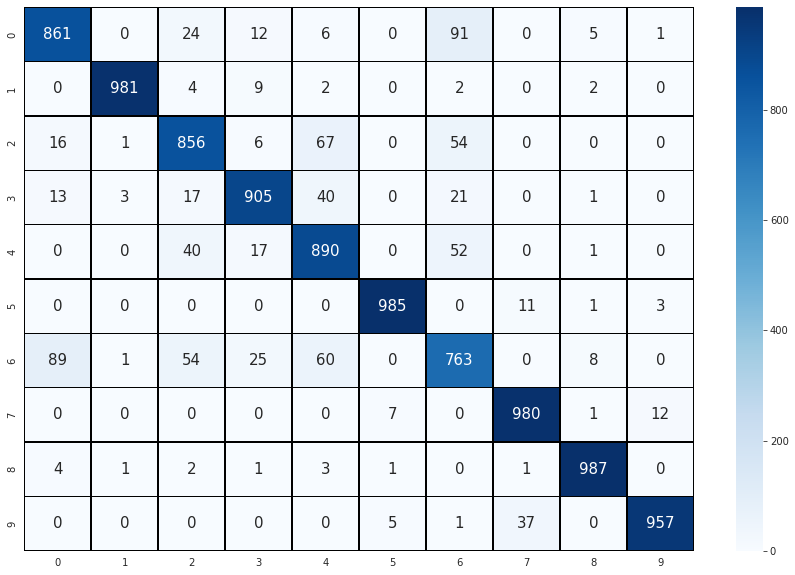

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___